In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the SMS Spam dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df.iloc[:, :2].copy()
df.columns = ['label', 'message']

# Map labels to numbers
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [3]:
def clean_text(text):
    # Lowercase
    text = text.lower() 
    # Remove punctuation
    text = re.sub(f"[{string.punctuation}]", "", text) 
    # Remove numbers
    text = re.sub(r"\d+", "", text) 
    return text

df['clean_message'] = df['message'].apply(clean_text)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'], df['label_num'], test_size=0.2, random_state=42
)

In [5]:
# CountVectorizer (Bag of Words)
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [6]:
# Using Naive Bayes with CountVectorizer
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)
y_pred_nb = nb.predict(X_test_cv)

print("--- Naive Bayes (CountVec) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

--- Naive Bayes (CountVec) ---
Accuracy: 0.9821
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [7]:
# Using Logistic Regression with TF-IDF
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("--- Logistic Regression (TF-IDF) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

--- Logistic Regression (TF-IDF) ---
Accuracy: 0.9507
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [8]:
# Using Logistic Regression with TF-IDF
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("--- Logistic Regression (TF-IDF) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

--- Logistic Regression (TF-IDF) ---
Accuracy: 0.9507
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



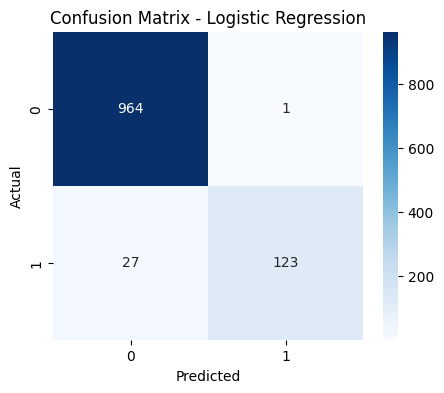

In [9]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


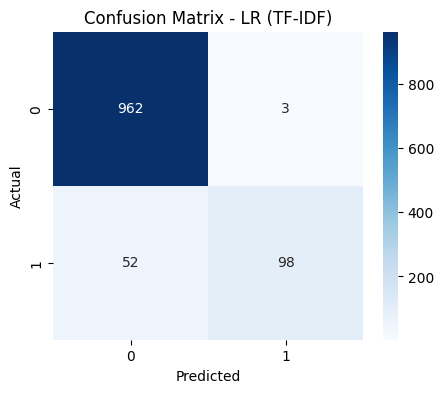

In [9]:
# Create a confusion matrix for the Logistic Regression model
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LR (TF-IDF)")
plt.show()

In [10]:
# Extract top words per class
feature_names = np.array(tfidf.get_feature_names_out())
coeffs = lr.coef_[0]

# Combine into a DataFrame
importance_df = pd.DataFrame({'Word': feature_names, 'Coefficient': coeffs})

print("Top 10 words indicating SPAM:")
print(importance_df.sort_values(by='Coefficient', ascending=False).head(10))

print("\nTop 10 words indicating HAM:")
print(importance_df.sort_values(by='Coefficient', ascending=True).head(10))

Top 10 words indicating SPAM:
         Word  Coefficient
6553      txt     4.746432
2252     free     4.280233
1078    claim     3.968240
5936     stop     3.854703
3899   mobile     3.787113
5137    reply     3.164666
6238     text     3.017597
4116      new     2.933039
4832    prize     2.887633
5454  service     2.815205

Top 10 words indicating HAM:
       Word  Coefficient
3592   ltgt    -1.993673
4304     ok    -1.790196
2925     im    -1.779944
2922    ill    -1.747590
1154   come    -1.461655
2446  going    -1.330646
2482    got    -1.255402
2766   home    -1.222906
3539    lor    -1.176900
5605    sir    -1.176789
